In [1]:
import numpy as np
import numpy.linalg as la
import scipy.linalg as sla
from scipy.interpolate import barycentric_interpolate as bint
from matplotlib import pyplot as plt
from scipy.optimize import root
from mpl_toolkits.mplot3d import Axes3D

### Problem 1

In [2]:
def cheb(N):
    x =  np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    dX = X - X.T
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D  = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x

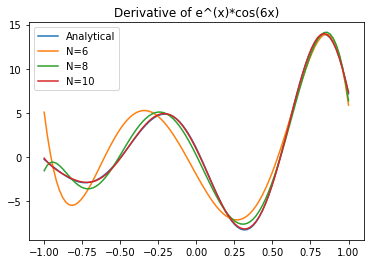

In [3]:
N = [6,8,10]
f = lambda x : np.exp(x)*np.cos(6*x)
df = lambda x : np.exp(x)*(np.cos(6*x)-6*np.sin(6*x))
x_even = np.linspace(-1,1,100)
y2 = df(x_even)
plt.plot(x_even,y2,label='Analytical')
for n in N :
    D,x = cheb(n)
    y = np.dot(D,f(x))
    y1 = bint(x,y,x_even)
    plt.plot(x_even,y1,label='N={}'.format(n))
plt.legend(loc=2)
plt.title('Derivative of e^(x)*cos(6x)')
plt.show()

### Problem 2

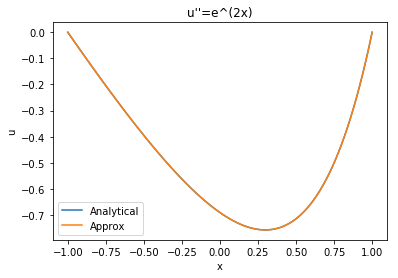

In [4]:
N = 8
f = lambda x : (-np.cosh(2)-np.sinh(2)*x+np.exp(2*x))/4
d2f = lambda x : np.exp(2*x)
x_even = np.linspace(-1,1,100)
y2 = f(x_even)
plt.plot(x_even,y2,label='Analytical')
D,x = cheb(n)
D2 = np.dot(D, D)
D2[0,:], D2[-1,:] = 0, 0
D2[0,0], D2[-1,-1] = 1, 1
F = d2f(x)
F[0], F[-1] = 0, 0
y = sla.solve(D2,F)
y1 = bint(x,y,x_even)
plt.plot(x_even,y1,label='Approx')
plt.legend(loc=3)
plt.title("u''=e^(2x)")
plt.ylabel('u')
plt.xlabel('x')
plt.show()

### Problem 3

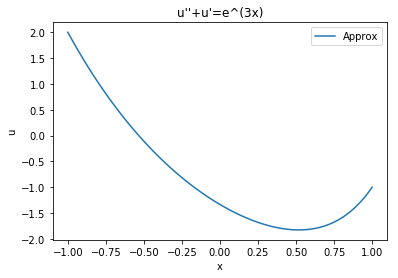

In [5]:
N = 8
L = lambda x : np.exp(3*x)
x_even = np.linspace(-1,1,100)
D,x = cheb(n)
D2 = np.dot(D, D)
R = D2 + D
R[0,:], R[-1,:] = 0, 0
R[0,0], R[-1,-1] = 1, 1
F = L(x)
F[0], F[-1] = -1, 2
y = sla.solve(R,F)
y1 = bint(x,y,x_even)
plt.plot(x_even,y1,label='Approx')
plt.legend(loc='best')
plt.title("u''+u'=e^(3x)")
plt.xlabel('x')
plt.ylabel('u')
plt.show()

### Problem 4

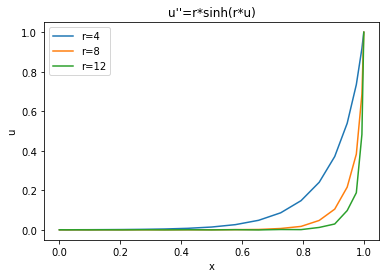

In [6]:
N = 20
D, x = cheb(N)
x_squished = [1/2*x[i]+1/2 for i in range(len(x))]
D2 = np.dot(D,D)
lamb = [4,8,12]
for l_ in lamb :
    def F(U):
        out = np.dot(D2,U) - l_*np.sinh(l_*U)  #Set up the equation you want the root of.
        #Make sure to set the boundaries correctly
        out[0] = U[0] - 1
        out[-1] = U[-1] - 0
        return out  #Newtons Method will update U until the output is all 0's.

    guess = np.ones_like(x)    #Make your guess, same size as the cheb(N) output
    solution = root(F, guess).x
    plt.plot(x_squished,solution,label='r={}'.format(l_))
plt.legend(loc=2)
plt.title("u''=r*sinh(r*u)")
plt.ylabel('u')
plt.xlabel('x')
plt.show()

### Problem 5

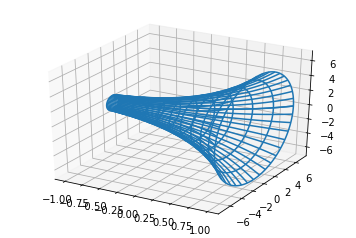

In [11]:
N = 50
x_even = np.linspace(-1,1,100)
D,x = cheb(N)
D2 = np.dot(D,D)
def F(U) :
    out = U*np.dot(D2,U) - np.dot(D,U)*np.dot(D,U)
    out -= np.ones_like(out)
    out[0] = U[0] - 7
    out[-1] = U[-1] - 1
    return out
guess = 2*np.ones_like(x)
solution = root(F,guess).x
barycentric = bint(x,solution,x_even) #This is the output of barycentric_interpolate() on 100 points
lin = np.linspace(-1, 1, 100)
theta = np.linspace(0,2*np.pi,401)
X, T = np.meshgrid(lin, theta)
Y, Z = barycentric*np.cos(T), barycentric*np.sin(T)
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
plt.show()